  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-

/tmp/ipykernel_36/1720032726.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


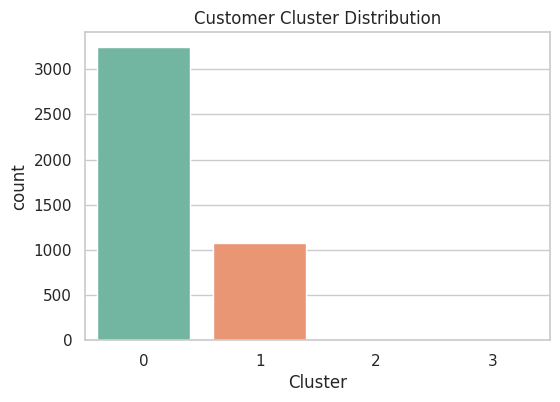

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

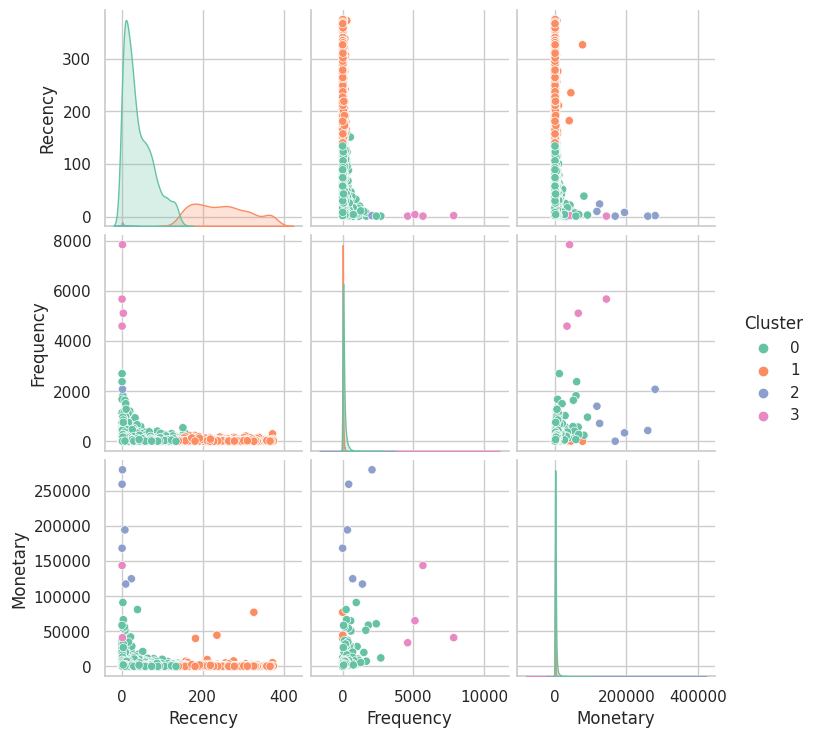

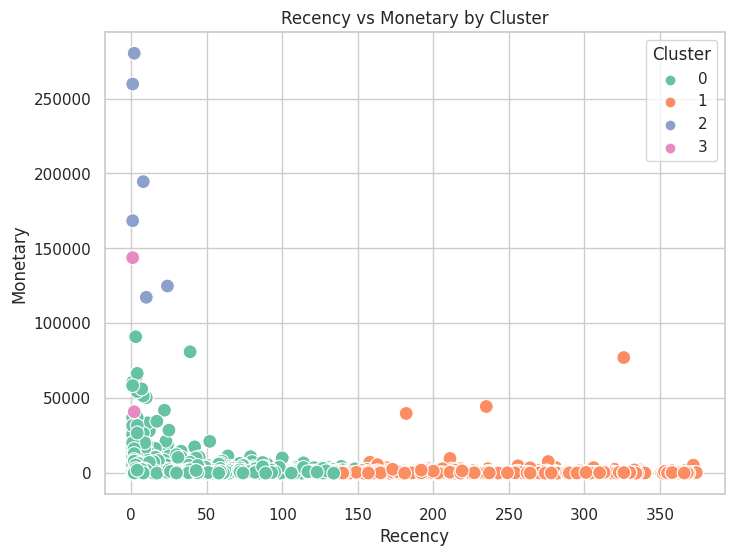

,CustomerID,Recency,Frequency,Monetary,Cluster
1689,14646.0,2,2076,280206.02,2
4201,18102.0,1,431,259657.30,2
3728,17450.0,8,337,194550.79,2
3008,16446.0,1,3,168472.50,2
1879,14911.0,1,5675,143825.06,3
55,12415.0,24,714,124914.53,2
1333,14156.0,10,1400,117379.63,2
3771,17511.0,3,963,91062.38,0
2702,16029.0,39,242,81024.84,0
0,12346.0,326,1,77183.60,1


In [1]:
# Customer Segmentation Analysis (RFM + KMeans)

# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 2: Load Dataset
data_path = "/kaggle/input/ecommerce-data-csv/ecommerce_data.csv"  # Adjust path for Kaggle / local
df = pd.read_csv(data_path, encoding='ISO-8859-1')

# Quick look
print(df.head())
print(df.info())

# Step 3: Data Cleaning
df = df.dropna(subset=['CustomerID'])
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]  # Remove cancelled
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
df = df[df['TotalSum'] > 0]

# Step 4: RFM Feature Engineering
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
}).reset_index()

rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalSum': 'Monetary'}, inplace=True)

# Step 5: KMeans Clustering
X = rfm[['Recency','Frequency','Monetary']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: Visualization
sns.set(style="whitegrid")

# Cluster distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', data=rfm, palette='Set2')
plt.title("Customer Cluster Distribution")
plt.show()

# Pairplot of RFM features by cluster
sns.pairplot(rfm[['Recency','Frequency','Monetary','Cluster']], hue='Cluster', palette='Set2')
plt.show()

# Recency vs Monetary scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='Set2', s=100)
plt.title("Recency vs Monetary by Cluster")
plt.show()

# Step 7: Sample Output
rfm.sort_values(by='Monetary', ascending=False).head(10)


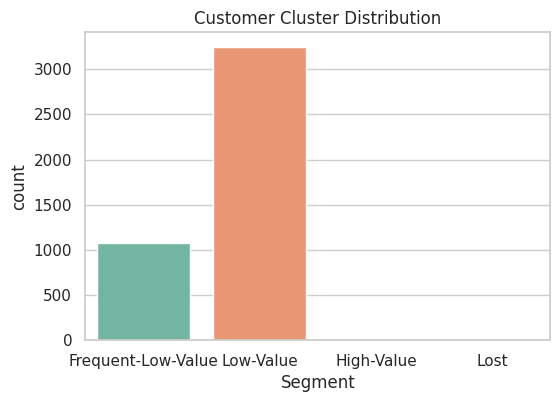

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

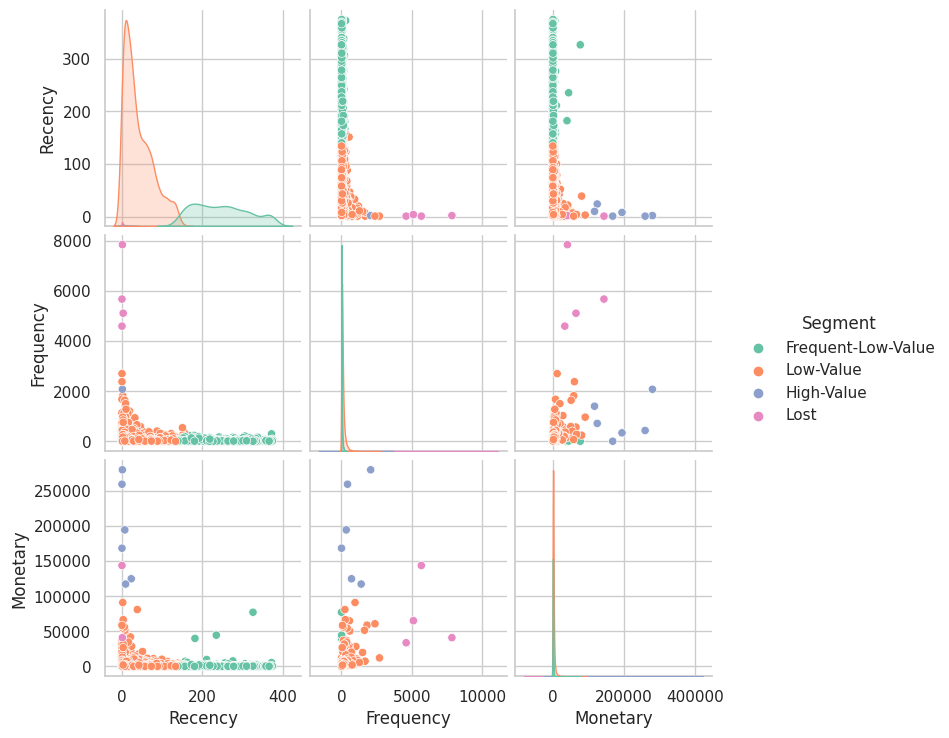

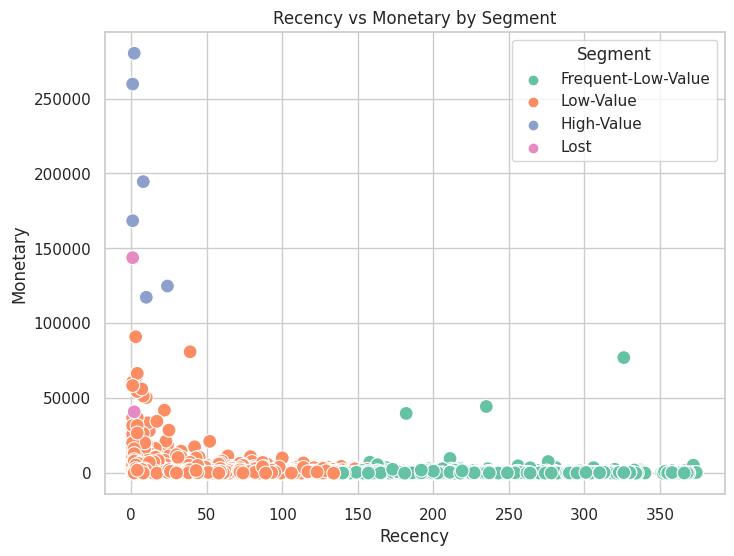

Top 10 High-Value Customers:
      CustomerID  Recency  Frequency   Monetary  Cluster     Segment
1689     14646.0        2       2076  280206.02        2  High-Value
4201     18102.0        1        431  259657.30        2  High-Value
3728     17450.0        8        337  194550.79        2  High-Value
3008     16446.0        1          3  168472.50        2  High-Value
55       12415.0       24        714  124914.53        2  High-Value
1333     14156.0       10       1400  117379.63        2  High-Value


In [5]:
# Customer Segmentation Analysis (RFM + KMeans)

# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 2: Load Dataset
data_path = "/kaggle/input/ecommerce-data-csv/ecommerce_data.csv"  # Change path for Kaggle
df = pd.read_csv(data_path, encoding='ISO-8859-1')

# Step 3: Data Cleaning
df = df.dropna(subset=['CustomerID'])
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]  # Remove cancelled orders

# Parse InvoiceDate safely
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y %H:%M', errors='coerce')

# Add total amount per row
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
df = df[df['TotalSum'] > 0]

# Step 4: RFM Feature Engineering
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
}).reset_index()

rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalSum': 'Monetary'}, inplace=True)

# Step 5: KMeans Clustering
X = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans with explicit n_init to remove warning
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

# Optional: Label clusters for interpretation
cluster_labels = {
    0: 'Low-Value',
    1: 'Frequent-Low-Value',
    2: 'High-Value',
    3: 'Lost'
}
rfm['Segment'] = rfm['Cluster'].map(cluster_labels)

# Step 6: Visualization
sns.set(style="whitegrid")

# Cluster distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Segment', data=rfm, palette='Set2')
plt.title("Customer Cluster Distribution")
plt.show()

# Pairplot of RFM features by cluster
sns.pairplot(rfm[['Recency','Frequency','Monetary','Segment']], hue='Segment', palette='Set2')
plt.show()

# Recency vs Monetary scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x='Recency', y='Monetary', hue='Segment', data=rfm, palette='Set2', s=100)
plt.title("Recency vs Monetary by Segment")
plt.show()

# Step 7: Top 10 High-Value Customers
top_customers = rfm[rfm['Segment'] == 'High-Value'].sort_values('Monetary', ascending=False).head(10)
print("Top 10 High-Value Customers:")
print(top_customers)

# Step 8: Save clustered data
rfm.to_csv('/kaggle/working/Fresh.csv', index=False)
